In [1]:
# 0. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")



## 1. Load dataset



In [10]:
df = pd.read_csv('D:\Datasets\Online retail\Data.csv', encoding='ISO-8859-1')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


## 2.Clean and Pre-Process

In [15]:
# Convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']



0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [18]:
# Creating new year/month/date columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


In [19]:
# Filtering by Date
df[df['InvoiceDate'] > '2011-01-01']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9


In [33]:
# missing customer id's sum and percentage
print(df['CustomerID'].isna().sum())

missing_percent = df['CustomerID'].isna().mean() * 100
print(missing_percent)

135080
24.926694334288598


In [34]:
# Drop rows without CustomerID (optional — since many records are missing it)
df = df.dropna(subset=['CustomerID'])

In [40]:
# No. of returns/cancellations
df[df['InvoiceNo'].astype(str).str.startswith('C')].shape[0]


8905

In [42]:
# Remove cancellations / returns: in this dataset, returns/invoices often have InvoiceNo starting with 'C'
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].shape[0]

397924

In [43]:
# Remove rows with non-positive quantity or price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]



In [45]:
# Create TotalPrice = quantity * price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice']



0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397884, dtype: float64

In [46]:
# Cast CustomerID (type float) to integer to str 
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['CustomerID']
                                                      

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 397884, dtype: object

In [49]:
# df after cleaning and pre processing
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010,12,1,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010,12,1,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,1,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,1,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010,12,1,54.08


## 3. KPI computation & Exploratory Data Analysis (EDA)

In [51]:
#Assuming cost is 60% of selling price, that means profit margin on cost is 66.67%
total_revenue = df['TotalPrice'].sum()
total_orders = len(df['InvoiceNo'].unique())
unique_customers = len(df['CustomerID'].unique())

avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
avg_customer_value = df.groupby('CustomerID')['TotalPrice'].sum().mean()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Unique Customers:", unique_customers)
print("Average Order Value (AOV):", avg_order_value)
print("Average Customer Value :", avg_customer_value)

Total Revenue: 8911407.904
Total Orders: 18532
Unique Customers: 4338
Average Order Value (AOV): 480.86595639974104
Average Customer Value : 2054.2664601198708


### 3.1 monthly/ trend of revenue


In [53]:
monthly = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum().reset_index()
monthly


,InvoiceDate,TotalPrice
0,2010-12-31,572713.890
1,2011-01-31,569445.040
2,2011-02-28,447137.350
3,2011-03-31,595500.760
4,2011-04-30,469200.361
5,2011-05-31,678594.560
6,2011-06-30,661213.690
7,2011-07-31,600091.011
8,2011-08-31,645343.900
9,2011-09-30,952838.382


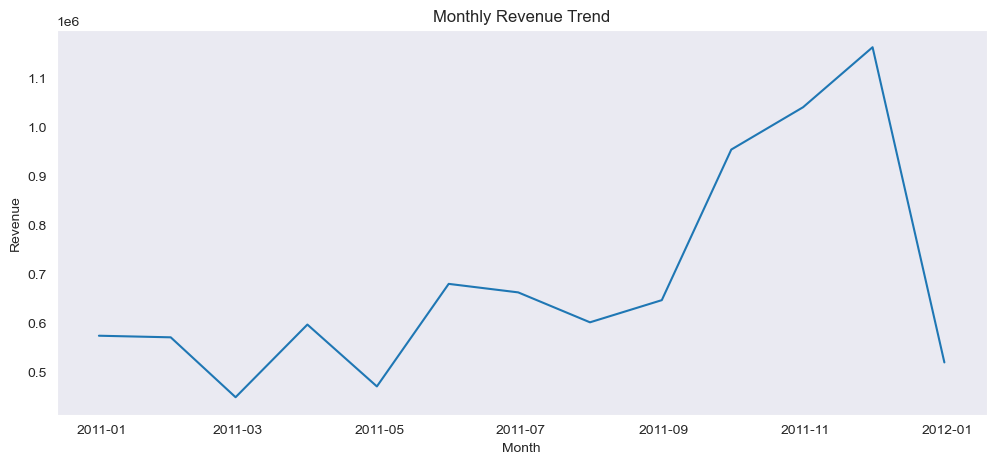

In [54]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='InvoiceDate', y='TotalPrice')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


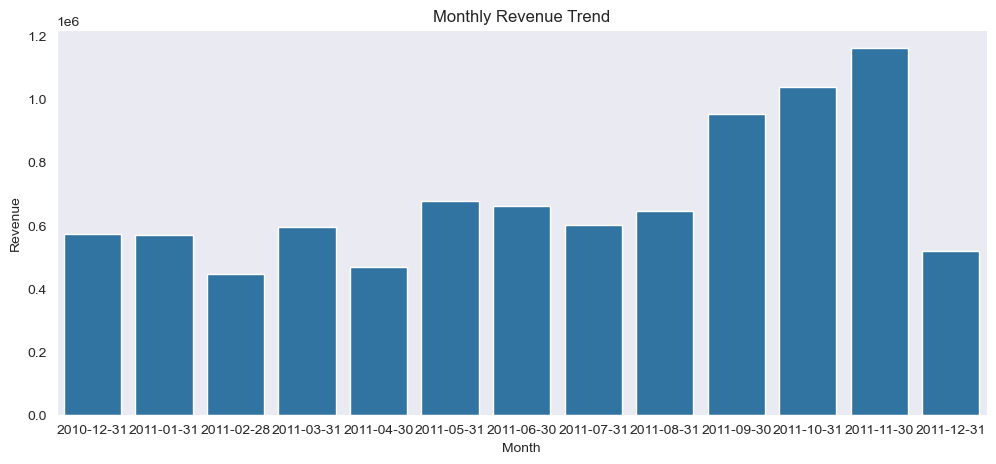

In [61]:
#barplot
plt.figure(figsize=(12,5))
sns.barplot(data=monthly, x='InvoiceDate', y='TotalPrice')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


### 3.2 weekly/ trend of revenue


In [70]:

weekly = df.set_index('InvoiceDate').resample('W')['TotalPrice'].sum().reset_index()
weekly['WeekNo'] = range(1, len(weekly) + 1)   
weekly = weekly.set_index('WeekNo')    
weekly.head()



,InvoiceDate,TotalPrice
WeekNo,,
1,2010-12-05,149386.33
2,2010-12-12,213447.72
3,2010-12-19,163770.73
4,2010-12-26,46109.11
5,2011-01-02,0.00


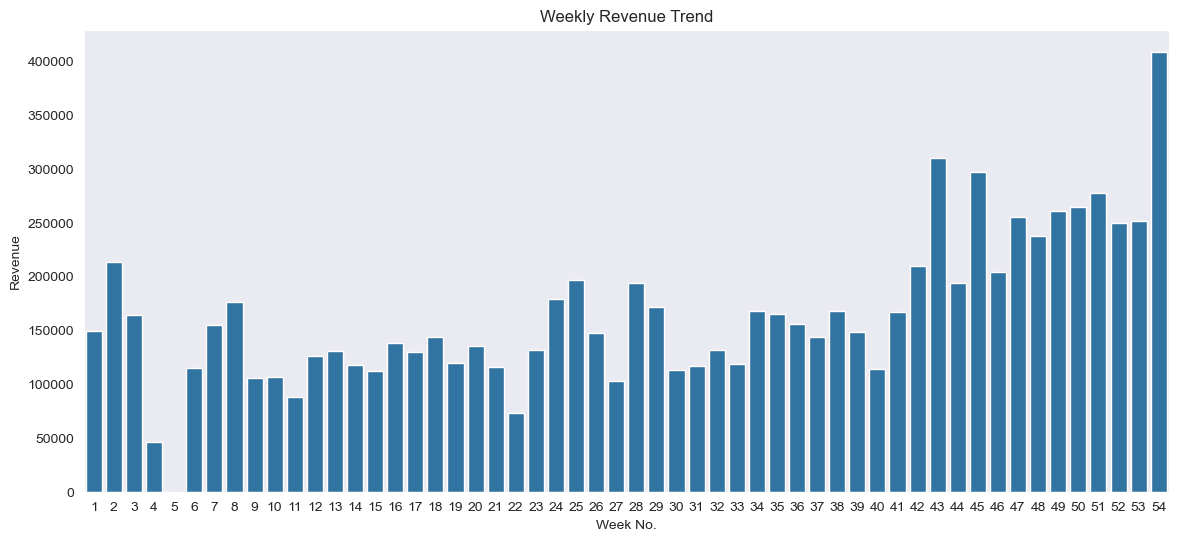

In [72]:
#barplot
plt.figure(figsize=(14,6))
sns.barplot(data=weekly, x='WeekNo', y='TotalPrice')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week No.')
plt.ylabel('Revenue')
plt.show()

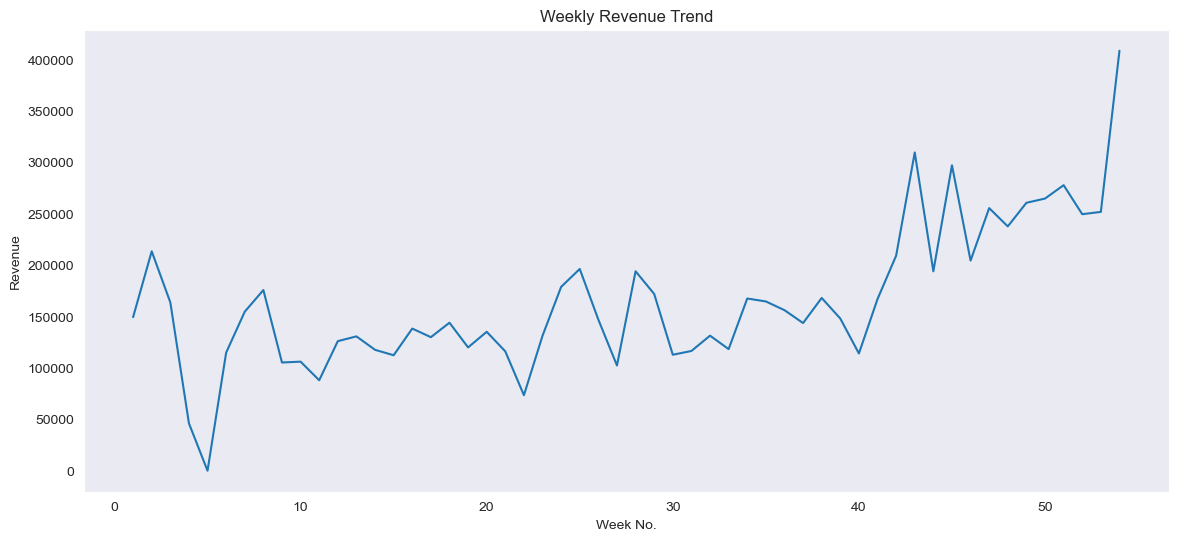

In [73]:
#lineplot
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly, x='WeekNo', y='TotalPrice')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week No.')
plt.ylabel('Revenue')
plt.show()

### 4.3 Top products BY REVENUE

In [79]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_products

,Description,TotalPrice
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


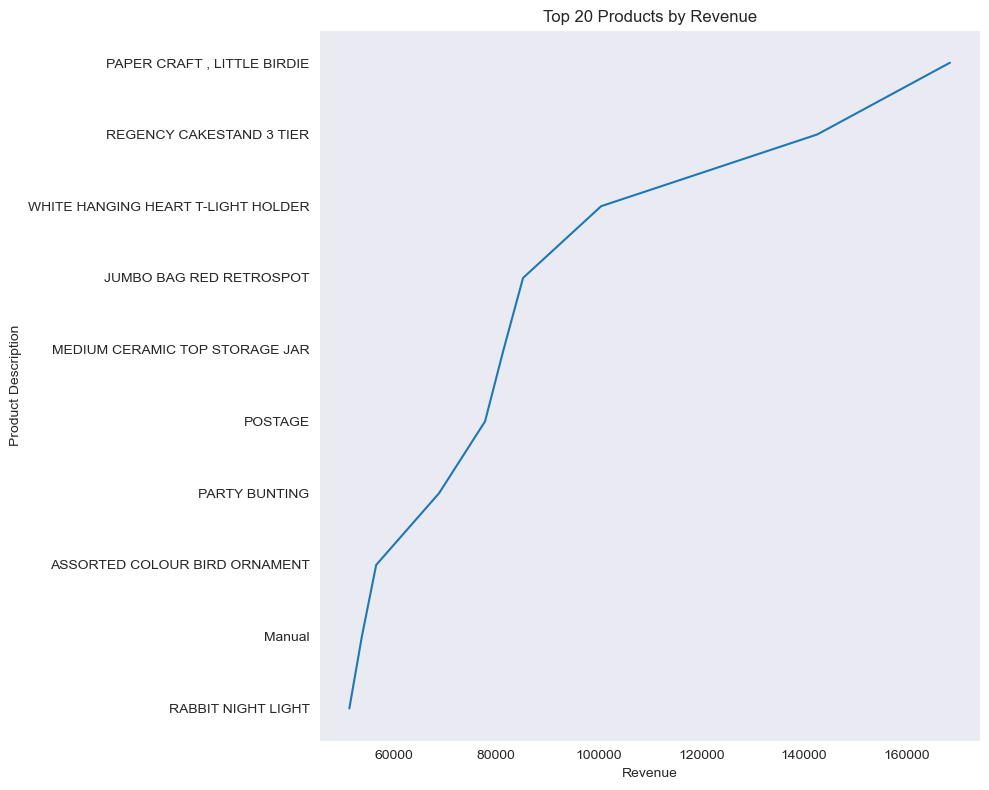

In [84]:
#lineplot

plt.figure(figsize=(10,8))
sns.lineplot(data=top_products, x='TotalPrice', y='Description')
plt.title('Top 20 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

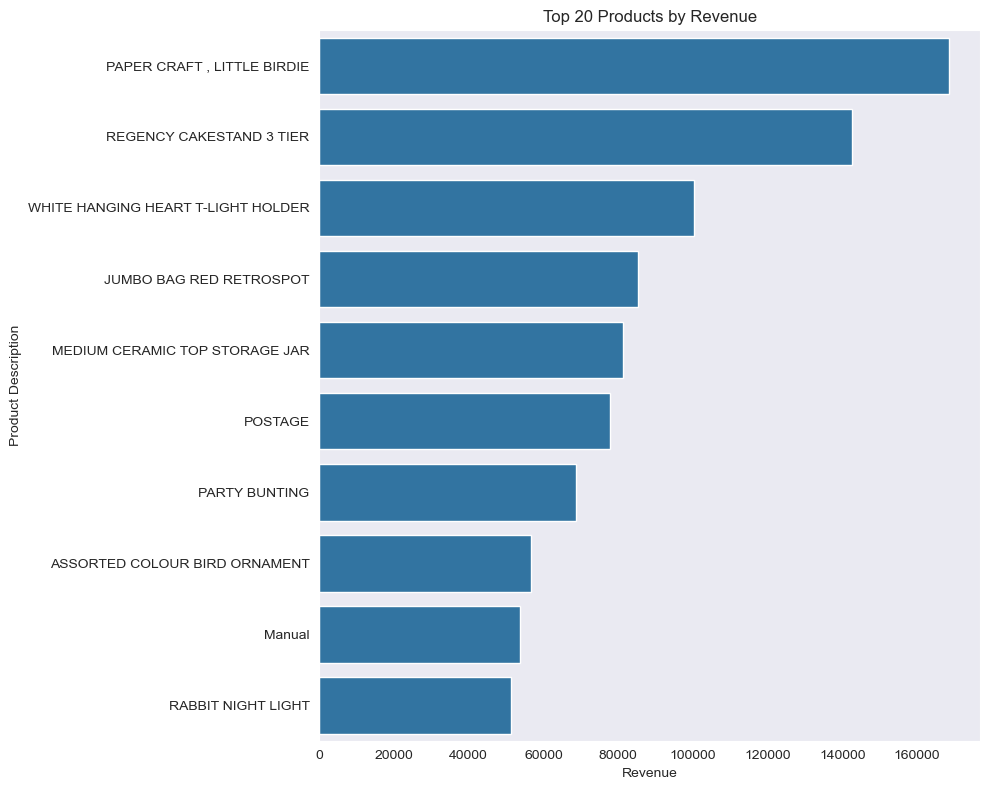

In [85]:
#barplot
plt.figure(figsize=(10,8))
sns.barplot(data=top_products, x='TotalPrice', y='Description', orient='h')
plt.title('Top 20 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### 4.4  Quantity distribution (to spot outliers / unusual orders)

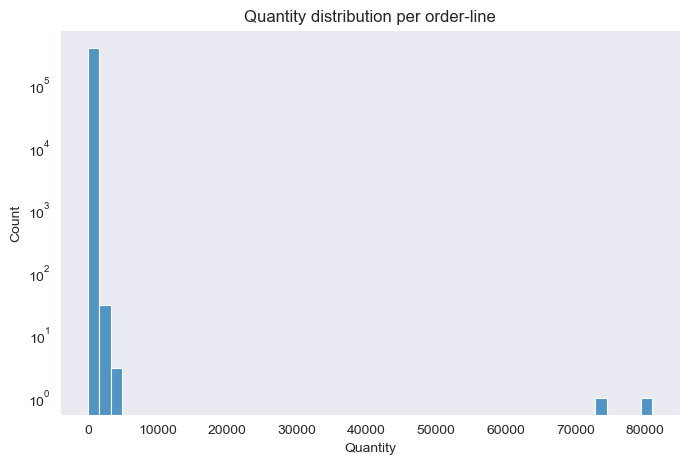

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50)
plt.title('Quantity distribution per order-line')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.yscale('log')  # because distribution may be skewed
plt.show()


### 4.5 Sales by Country (region-wise insights)

In [87]:
#top 10 region-wise sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
country_sales



,Country,TotalPrice
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


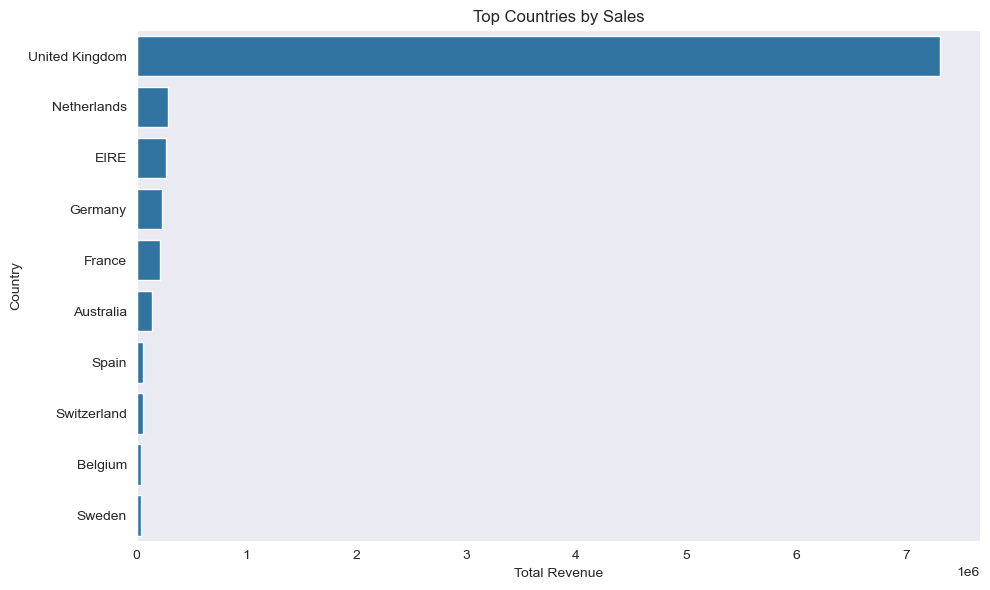

In [88]:
#barplot
plt.figure(figsize=(10,6))
sns.barplot(data=country_sales, x='TotalPrice', y='Country')
plt.title('Top Countries by Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

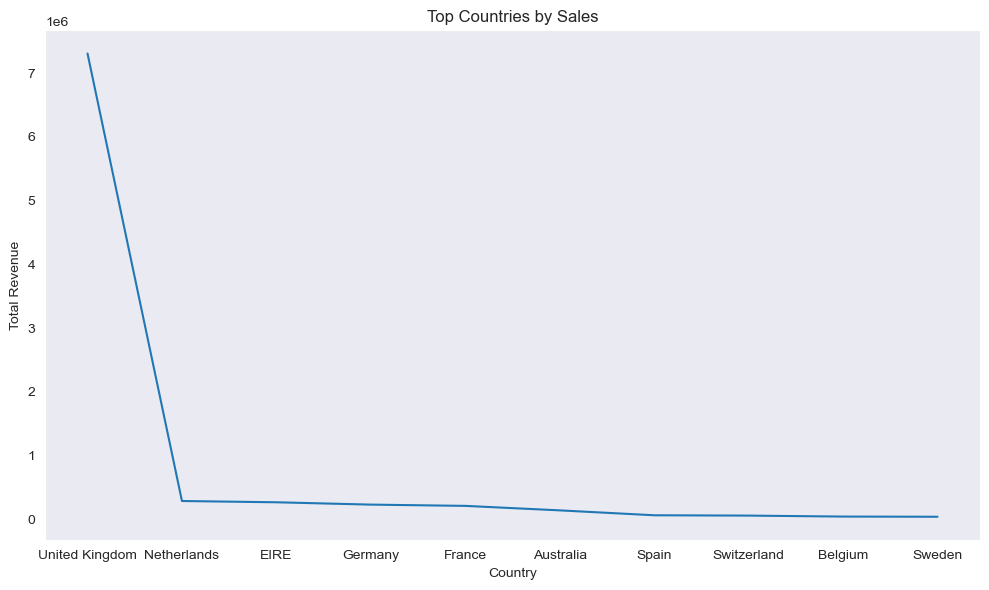

In [90]:
#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=country_sales, x='Country', y='TotalPrice')
plt.title('Top Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### 4.6 Correlation Heatmaps

In [92]:
corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
corr



,Quantity,UnitPrice,TotalPrice
Quantity,1.000000,-0.004563,0.914387
UnitPrice,-0.004563,1.000000,0.081645
TotalPrice,0.914387,0.081645,1.000000


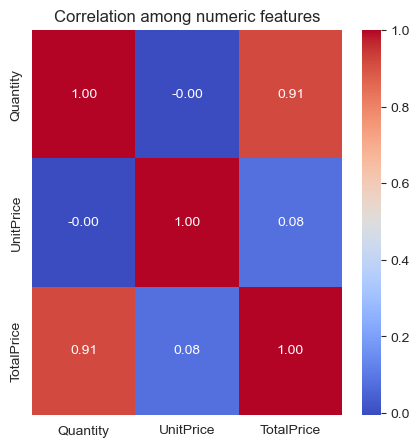

In [93]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation among numeric features')
plt.show()

## 5.Customer Behavior Analytics: Cohort + RFM 

### 5.1 Cohort Analysis (customer retention over time)

In [97]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().dt.to_period('M').rename('CohortMonth')
first_purchase

first_purchase_asdf = df.groupby('CustomerID')['InvoiceDate'] \
                   .min().dt.to_period('M') \
                   .reset_index(name='CohortMonth')
first_purchase_asdf


,CustomerID,CohortMonth
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02
...,...,...
4333,18280,2011-03
4334,18281,2011-06
4335,18282,2011-08
4336,18283,2011-01


In [98]:
orders = df.groupby(['CustomerID', 'InvoiceMonth'])['InvoiceNo'].nunique().reset_index()

orders = orders.merge(first_purchase, on='CustomerID')
orders['CohortIndex'] = (orders['InvoiceMonth'] - orders['CohortMonth']).apply(lambda x: x.n)

cohort_counts = orders.pivot_table(index='CohortMonth',
                                   columns='CohortIndex',
                                   values='InvoiceNo',
                                   aggfunc='nunique').fillna(0)
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)



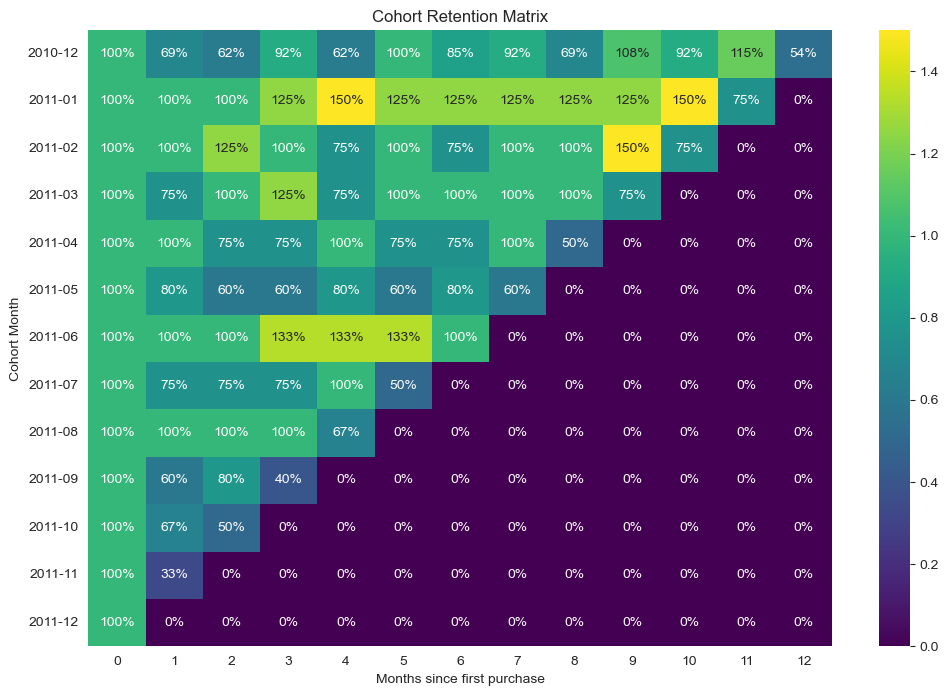

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Retention Matrix')
plt.xlabel('Months since first purchase')
plt.ylabel('Cohort Month')
plt.show()